# EDA on Iris dataset

You will find the iris dataset <a href="https://www.kaggle.com/uciml/iris"> Here </a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings;
warnings.filterwarnings('ignore');

In [2]:
iris=pd.read_csv('iris.csv')

In [3]:
iris.shape

(150, 5)

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [7]:
st=iris[iris['species']=="setosa"]
st['petal_length'].value_counts()

1.4    13
1.5    13
1.3     7
1.6     7
1.7     4
1.2     2
1.9     2
1.1     1
1.0     1
Name: petal_length, dtype: int64

# 2-D Scatter Plots

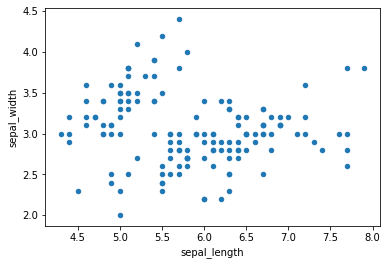

In [8]:
iris.plot(kind='scatter',x='sepal_length',y='sepal_width');
plt.show()

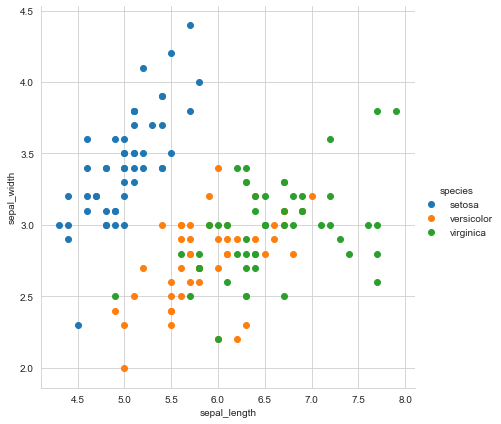

In [32]:
#here we plot the scatter diagram with colour coding 

sns.set_style('whitegrid')
sns.FacetGrid(iris,hue="species",size=6).map(plt.scatter,"sepal_length","sepal_width").add_legend()
plt.show()

# Pair Plot

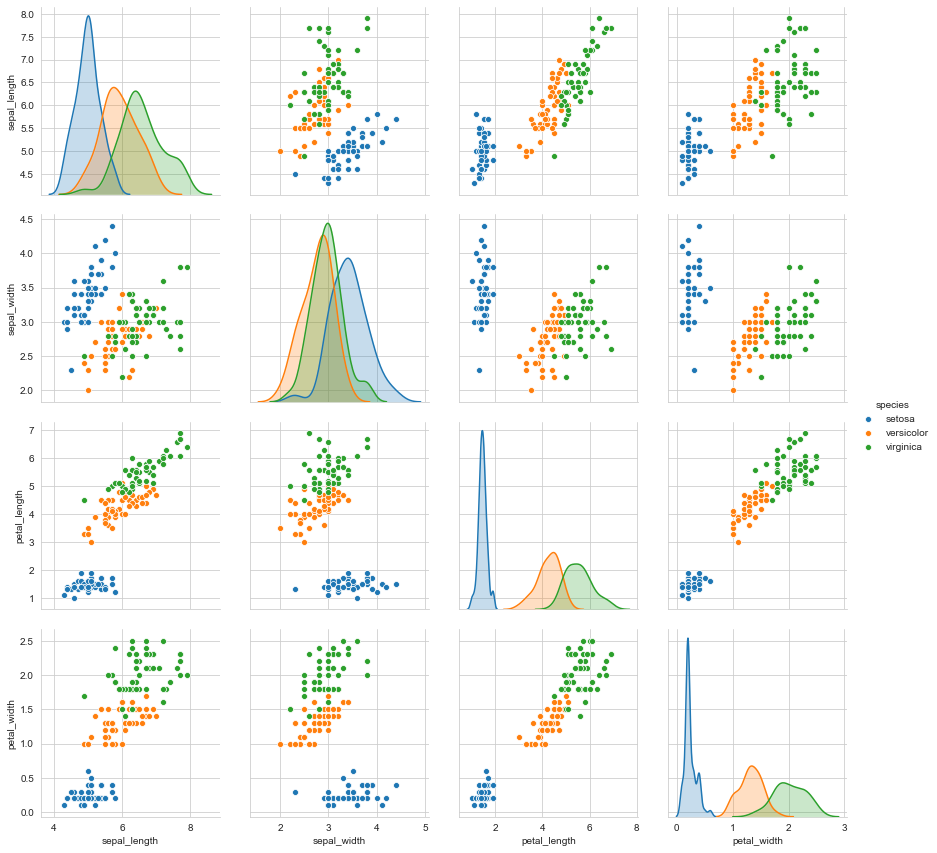

In [35]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3)       #hue = "species"
plt.show()

# Histogram,PDF,CDF

In [36]:
import numpy as np
iris_setosa=iris.loc[iris["species"]=="setosa"];
#iris_setosa
iris_versicolor=iris.loc[iris["species"]=="versicolor"];
iris_virginica=iris.loc[iris["species"]=="virginica"];

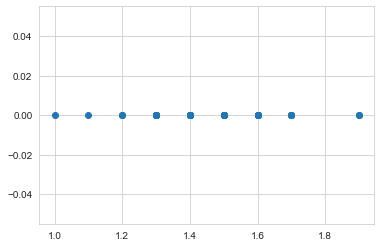

In [37]:
plt.plot(iris_setosa["petal_length"],np.zeros_like(iris_setosa['petal_length']), 'o')
plt.show()

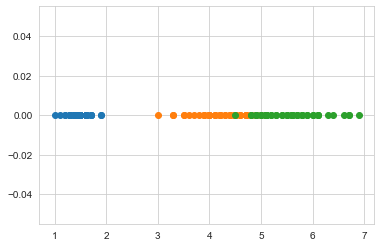

In [12]:
plt.plot(iris_setosa["petal_length"],np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"],np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"],np.zeros_like(iris_virginica['petal_length']), 'o') 
plt.show()

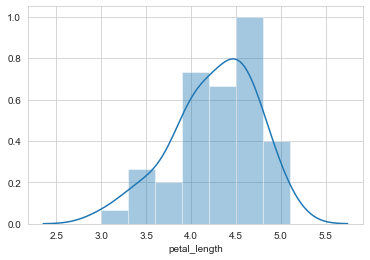

In [40]:
sns.distplot(iris[iris['species'] == 'versicolor']['petal_length'])

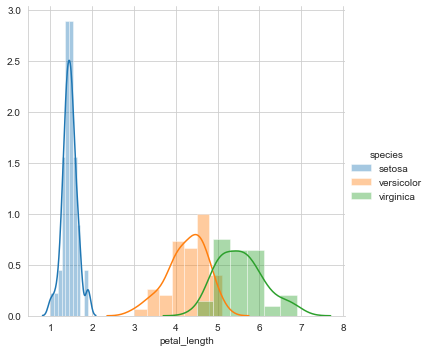

In [41]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();



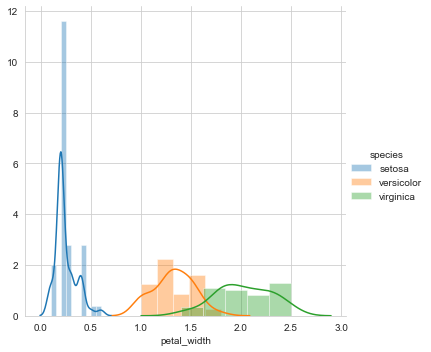

In [42]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

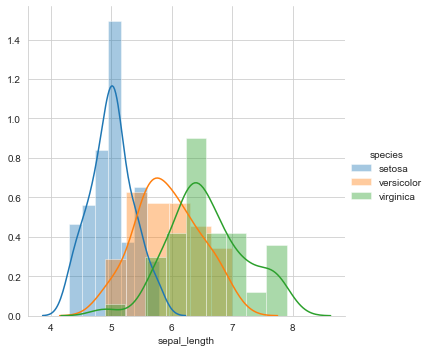

In [16]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

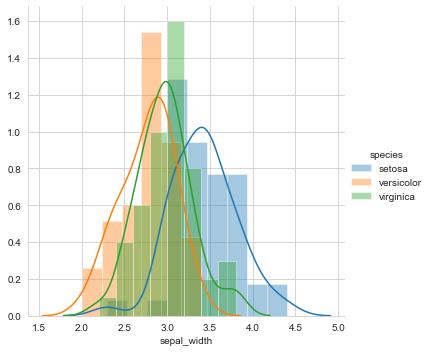

In [17]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

# Calculating PDF Points

Printing the counts for histogram
 [ 1  1  2  7 13 13  7  4  0  2]
Sum of count is
 50
Printing Edges of bins 
 [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
PDF is as followes  
 [0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]


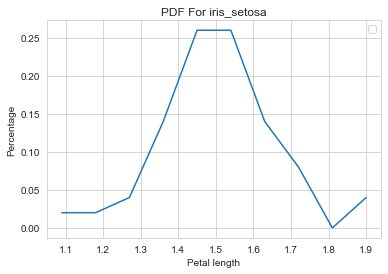

In [48]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = False)

print("Printing the counts for histogram\n",counts)
pdf = counts/(sum(counts))
print("Sum of count is\n",sum(counts))
print("Printing Edges of bins \n",bin_edges)
print("PDF is as followes  \n",pdf);

plt.gca().legend(('Pdf'))
plt.title('PDF For iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.plot(bin_edges[1:],pdf)

# Calculating CDF Points


Prrinting the counts for histogram
 [ 1  1  2  7 13 13  7  4  0  2]
Sum of count is
 50
Printing Edges of bins 
 [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
PDF is as followes  
 [0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
CDF Is as followes
 [0.02 0.04 0.08 0.22 0.48 0.74 0.88 0.96 0.96 1.  ]


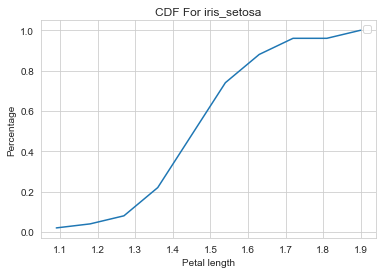

In [19]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = False)

print("Prrinting the counts for histogram\n",counts)
pdf = counts/(sum(counts))
print("Sum of count is\n",sum(counts))

print("Printing Edges of bins \n",bin_edges)

print("PDF is as followes  \n",pdf);

cdf = np.cumsum(pdf)
print("CDF Is as followes\n",cdf)
plt.gca().legend(('Cdf'))
plt.title('CDF For iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")

plt.plot(bin_edges[1:],cdf)

[0.22222222 0.22222222 0.44444444 1.55555556 2.88888889 2.88888889
 1.55555556 0.88888889 0.         0.44444444]
[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


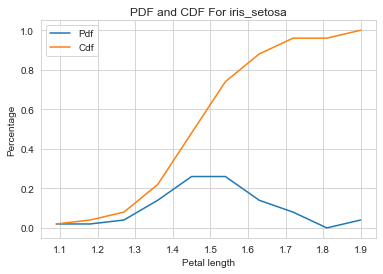

In [20]:

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)

print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.gca().legend(('Pdf','Cdf'))
plt.title('PDF and CDF For iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.show();

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


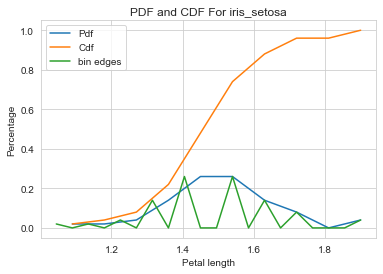

In [49]:

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)
plt.gca().legend(('Pdf','Cdf','bin edges'))
plt.title('PDF and CDF For iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.show()

# PDF and CDF For all species

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


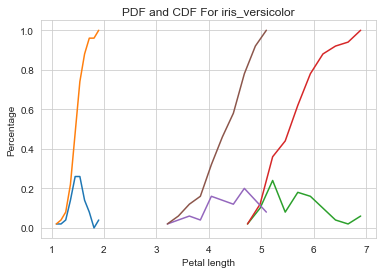

In [22]:


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF For iris_versicolor')
plt.xlabel("Petal length")
plt.ylabel("Percentage")

plt.show();

# Mean, Variance, Std-deviation

In [50]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

# standard Deviation
print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Means:
1.4620000000000002
2.4137254901960787
5.552
4.26

Std-dev:
0.17191858538273286
0.5463478745268441
0.4651881339845204


# Median, Quantiles, Percentiles, IQR.

In [24]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# Box Plot

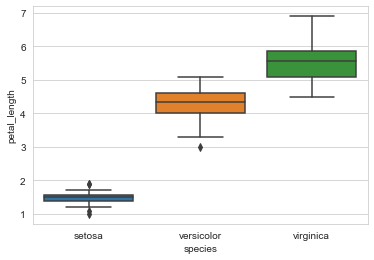

In [25]:
sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

# Violin Plot

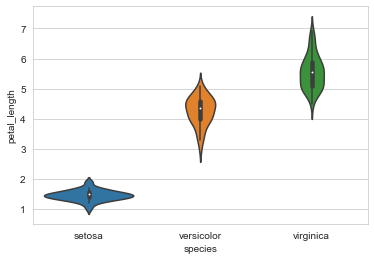

In [26]:

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

# Multivariate probability density, contour plot.

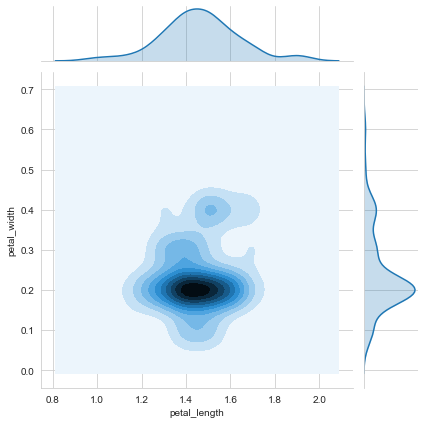

In [27]:
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();